# The Boston House Price Dataset

The Boston House Price Dataset involves the prediction of a house price in thousands of dollars given details of the house and its neighborhood.

It is a **regression problem**. There are **506 observations** with **13 input variables** and **1 output variable**. The variable names are as follows:

- **CRIM**: per capita crime rate by town.
- **ZN**: proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS**: proportion of nonretail business acres per town.
- **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- **NOX**: nitric oxides concentration (parts per 10 million).
- **RM**: average number of rooms per dwelling.
- **AGE**: proportion of owner-occupied units built prior to 1940.
- **DIS**: weighted distances to five Boston employment centers.
- **RAD**: index of accessibility to radial highways.
- **TAX**: full-value property-tax rate per $10,000.
- **PTRATIO**: pupil-teacher ratio by town.
- **B**: 1000(Bk – 0.63)^2 where Bk is the proportion of blacks by town.
- **LSTAT**: % lower status of the population.
- **MEDV**: Median value of owner-occupied homes in $1000s.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## 1. Datenexploration und -visualisierung

In [4]:

file_path = 'housing.data.txt' 
df = pd.read_csv(file_path, delim_whitespace=True, header=None)
print(df.head())

column_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", 
    "PTRATIO", "B", "LSTAT", "MEDV"
] 

df = pd.read_csv(file_path, delim_whitespace=True, header=None, names=column_names)


        0     1     2   3      4      5     6       7   8      9     10  \
0  0.00632  18.0  2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1  0.02731   0.0  7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2  0.02729   0.0  7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3  0.03237   0.0  2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4  0.06905   0.0  2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   

       11    12    13  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


In [5]:
print("Erste fünf Zeilen des Datensatzes:")
print(df.head())
print("\n" + "-"*150 + "\n")
print("Informationen über den Datensatz:")
print(df.info())
print("\n" + "-"*150 + "\n")
print("Statistische Zusammenfassung des Datensatzes:")
print(df.describe())
print("\n" + "-"*150 + "\n")
print("Anzahl der fehlenden Werte pro Spalte:")
print(df.isnull().sum())


Erste fünf Zeilen des Datensatzes:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  

------------------------------------------------------------------------------------------------------------------------------------------------------

Informationen über den Datensatz:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  

**Bemerkung**:  
Der signifikante Unterschied zwischen dem 75. Perzentil und dem Maximalwert in mehreren Variablen, wie CRIM oder ZN, weist auf die Wahrscheinlichkeit hin, dass zahlreiche Ausreißer (Outliers) vorhanden sind. Diese Ausreißer könnten die Analyse verzerren und erfordern Behandlungen wie Standardisierung oder logarithmische Transformationen für stark asymmetrische Variablen.


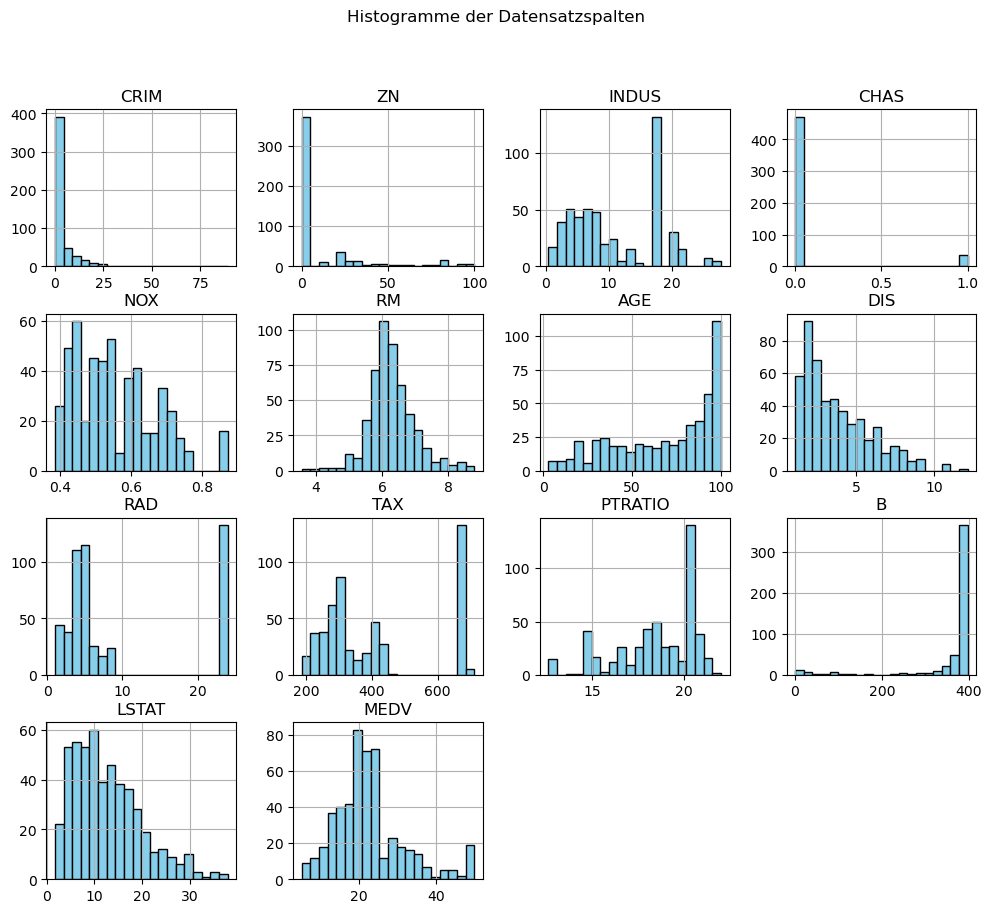

In [6]:

df.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histogramme der Datensatzspalten")
plt.show()


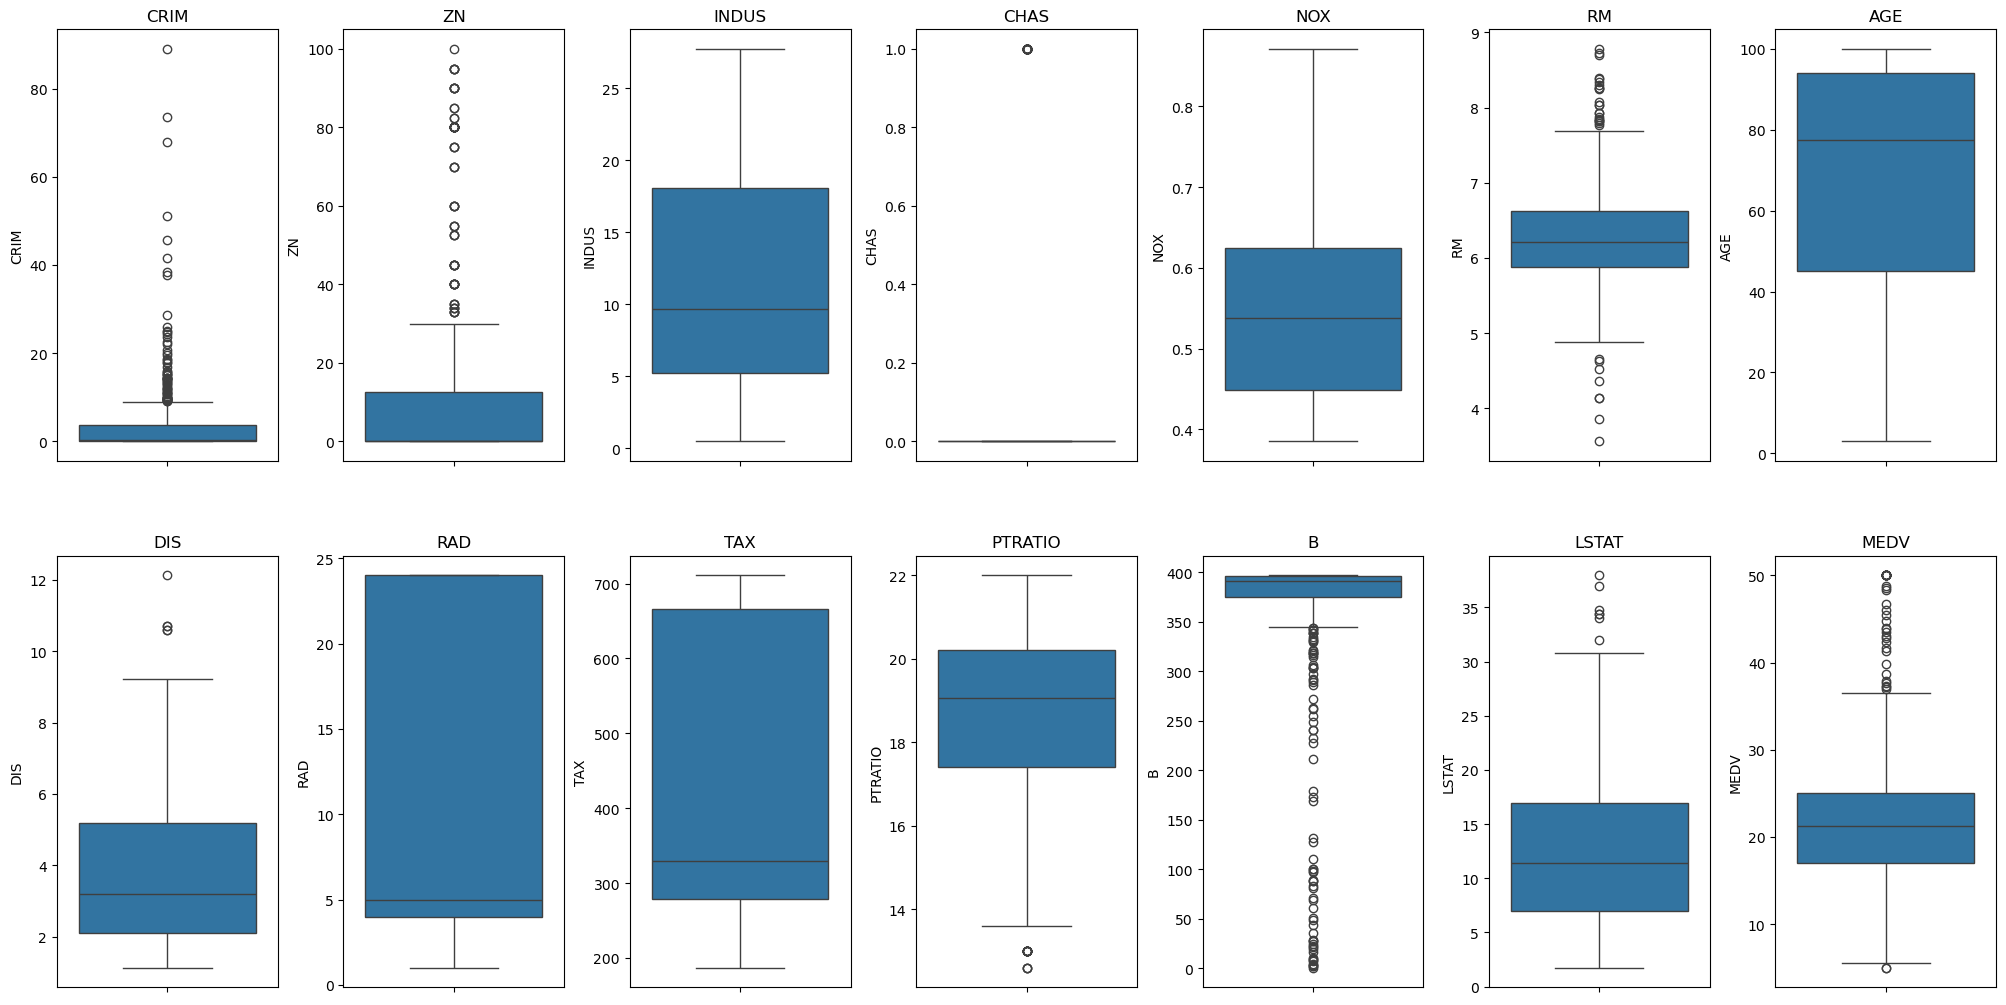

In [7]:

fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
ax = ax.flatten()

index = 0
for col in df.columns:
    sns.boxplot(y=df[col], ax=ax[index])
    ax[index].set_title(f"{col}") 
    index += 1
    if index >= len(ax):
        break  

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

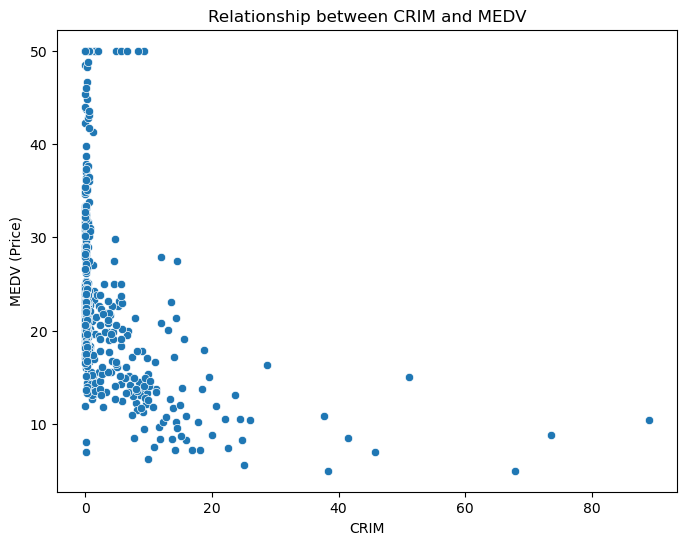

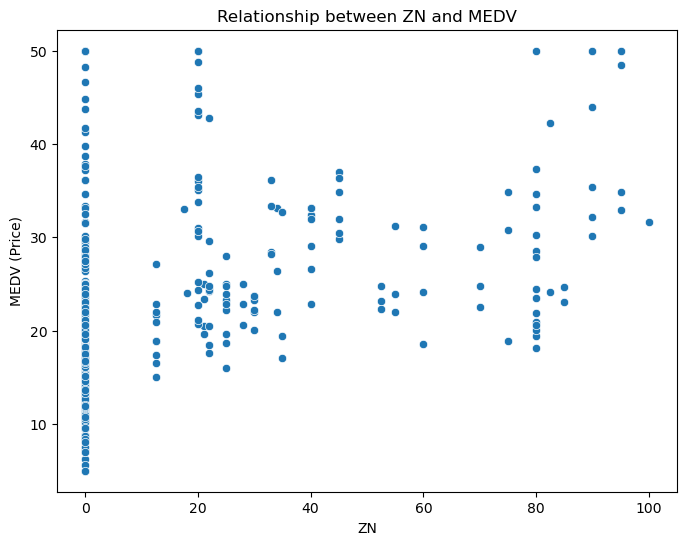

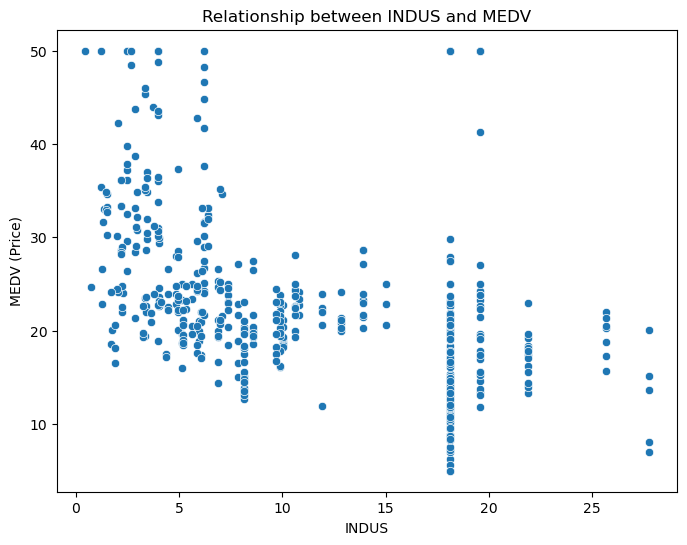

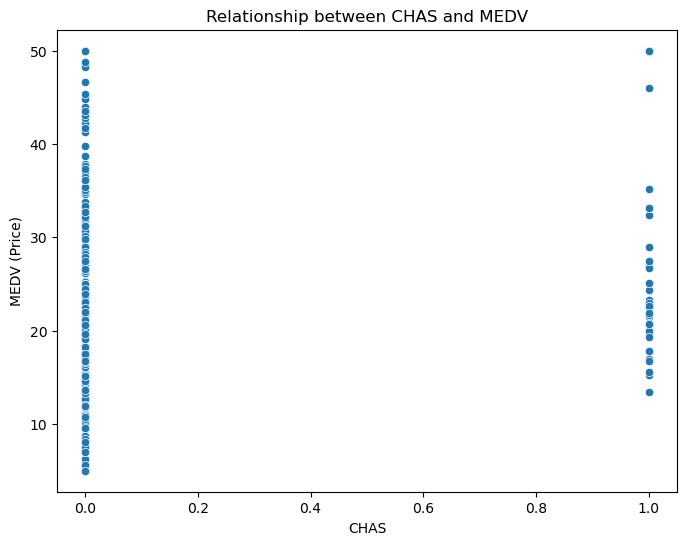

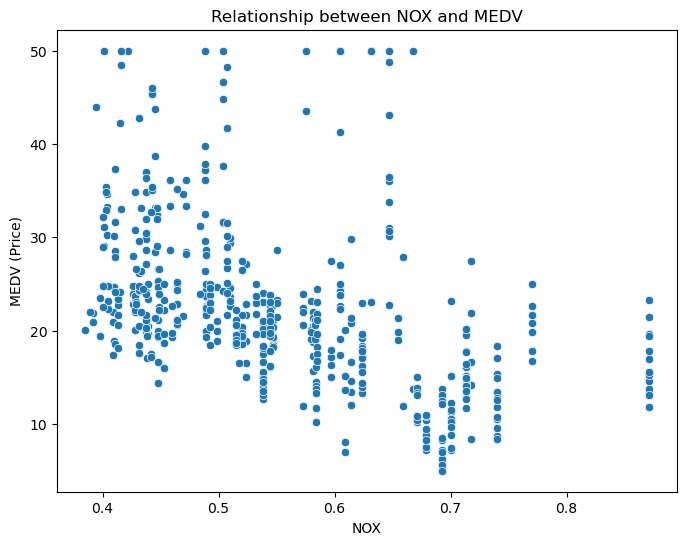

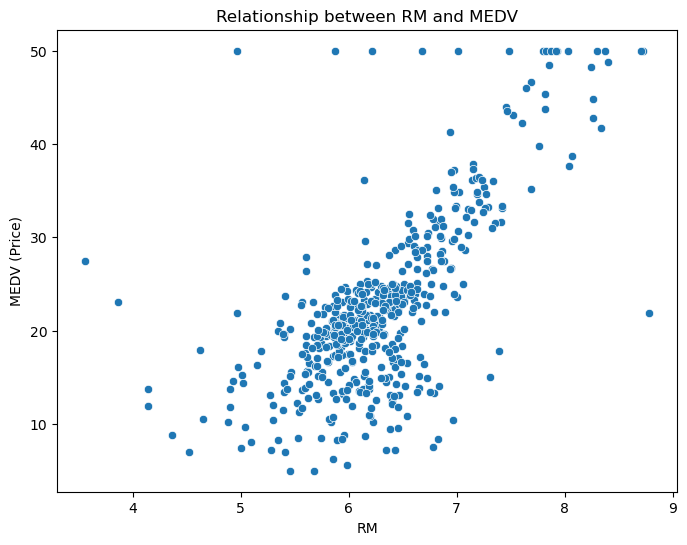

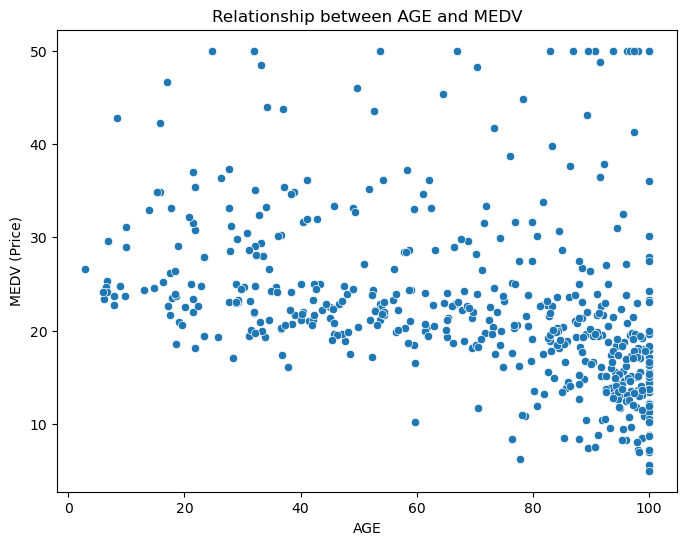

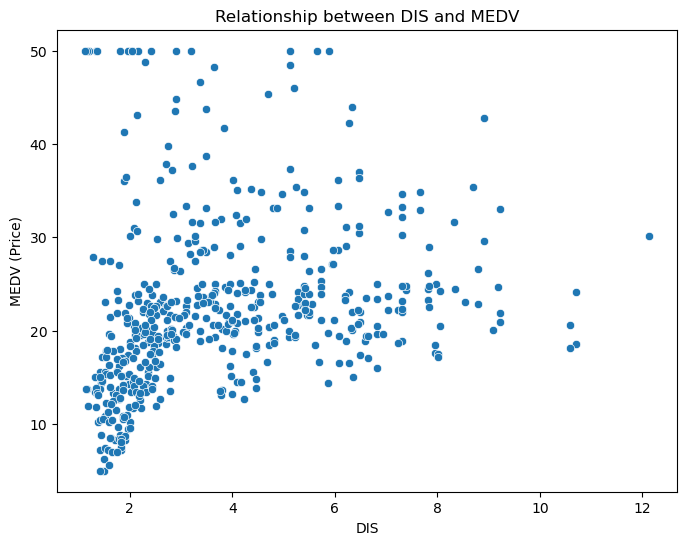

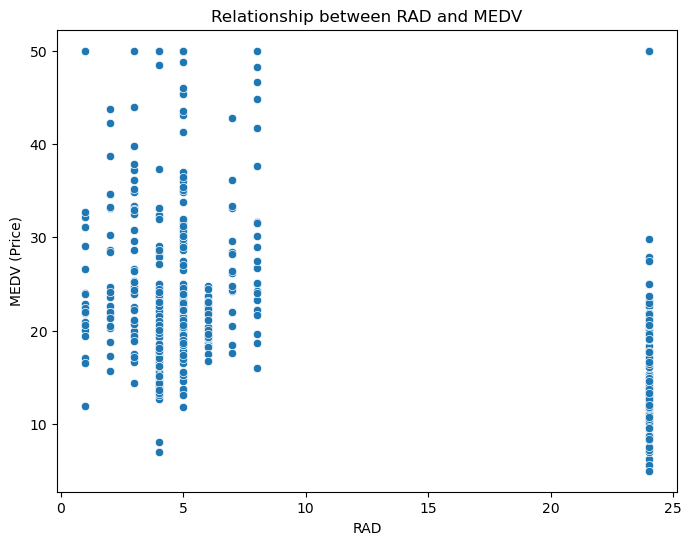

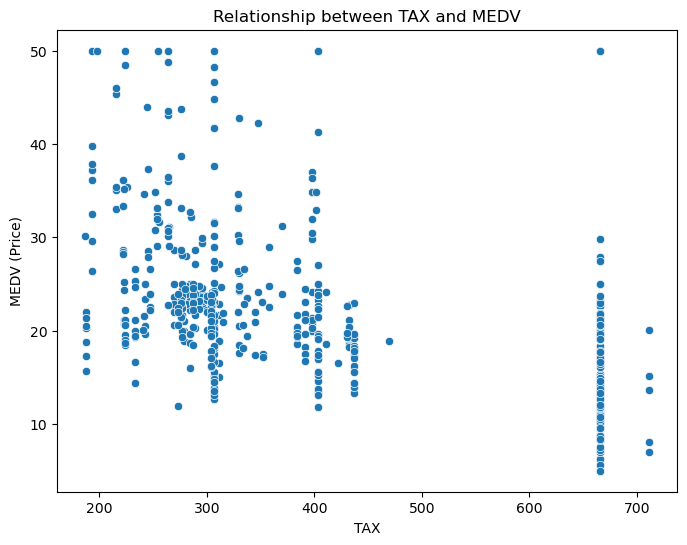

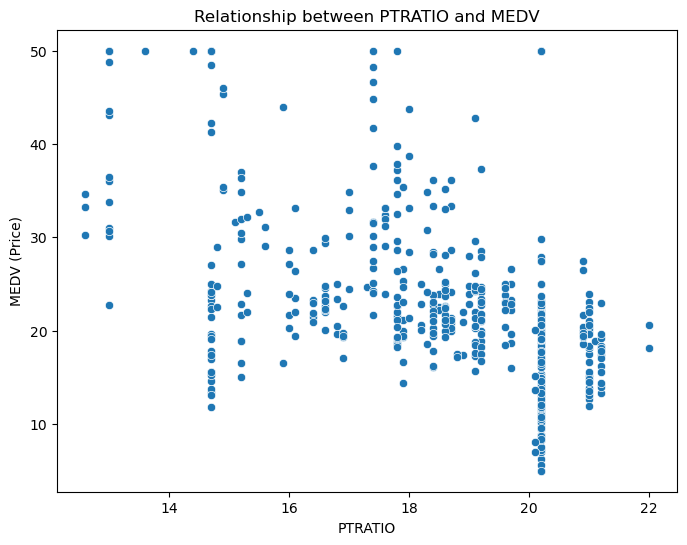

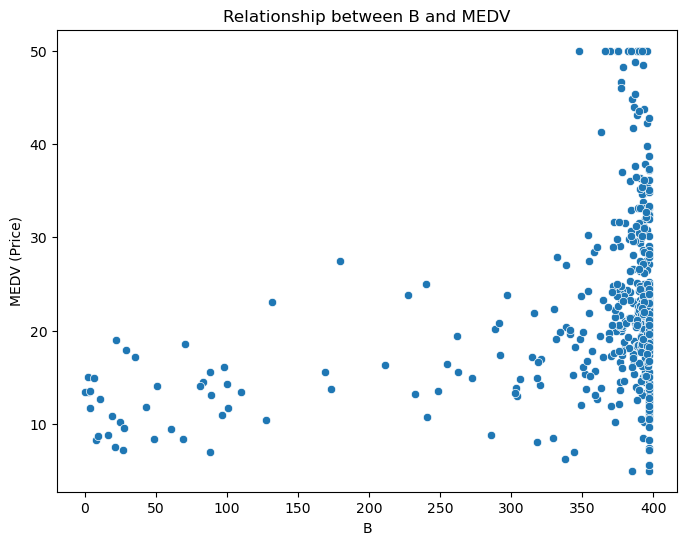

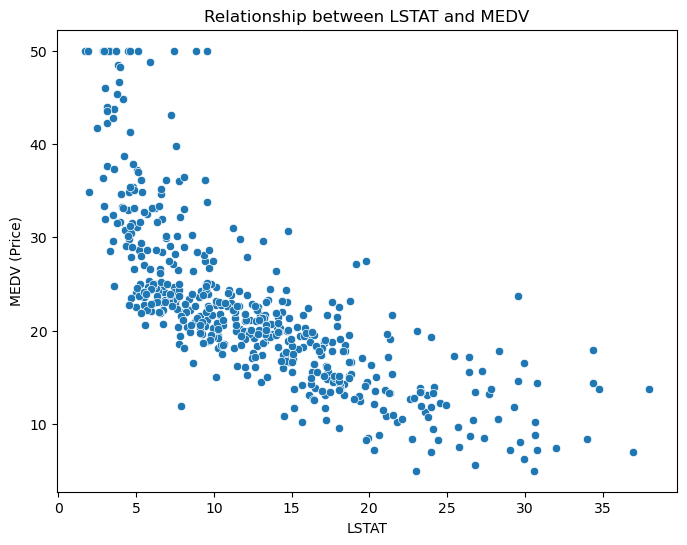

In [8]:


features = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", 
            "PTRATIO", "B", "LSTAT"]


for feature in features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[feature], y=df['MEDV'])
    plt.title(f'Relationship between {feature} and MEDV')
    plt.xlabel(feature)
    plt.ylabel('MEDV (Price)')
    plt.show()



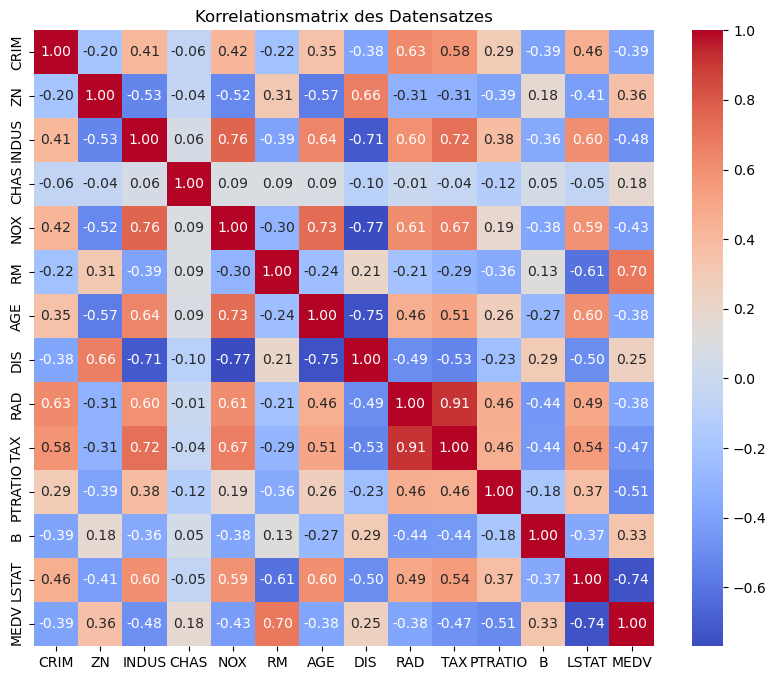

In [9]:


plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Korrelationsmatrix des Datensatzes")
plt.show()


###  Analyse der Leistungsfähigkeit von Regressionsmodellen mit teilweiser Normalisierung der Daten

Model                MSE             R2        
Gradient Boosting    6.20886         0.91533   
XGBRegressor         6.90923         0.90578   
Random Forest        7.83202         0.89320   
ExtraTrees Regressor 9.44557         0.87120   
Decision Tree        10.41608        0.85796   
AdaBoost             13.10895        0.82124   
Linear Regression    24.29112        0.66876   
Ridge Regression     24.48001        0.66618   
Lasso Regression     24.95567        0.65970   
KNN Regressor        41.33455        0.43635   
SVR                  55.40946        0.24442   


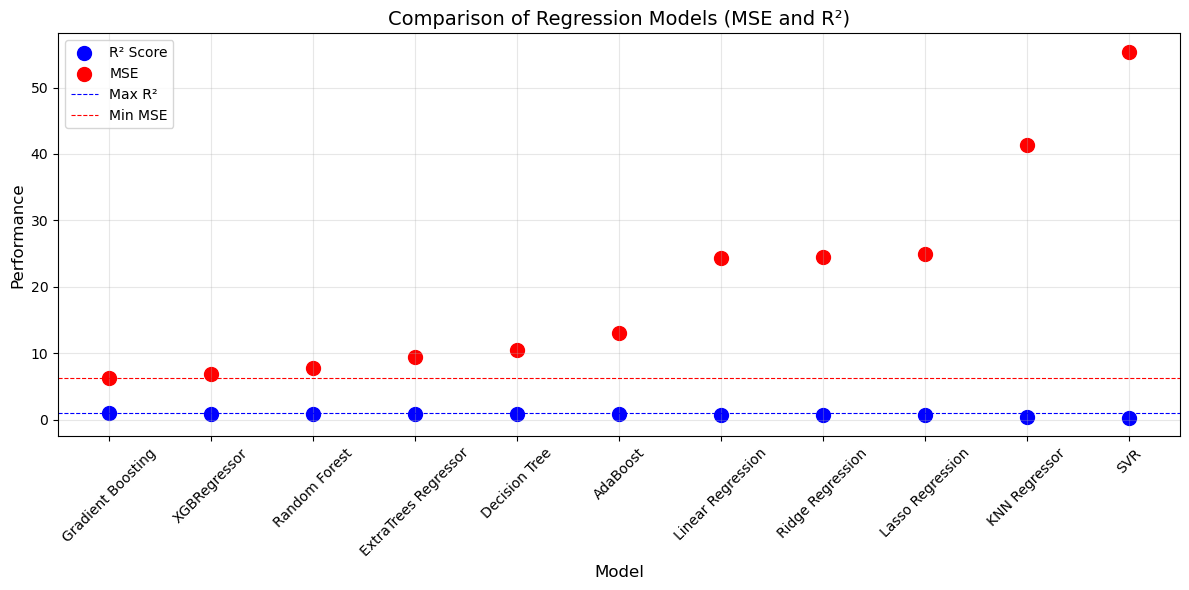

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler


columns_to_standardize = ['CRIM', 'ZN', 'B', 'LSTAT']

scaler = StandardScaler()
df_standardized_columns = scaler.fit_transform(df[columns_to_standardize])

df[columns_to_standardize] = df_standardized_columns

X = df.drop(columns=['MEDV']) 
y = df['MEDV']

X_train0, X_test0, y_train0, y_test0 = train_test_split(X, y, test_size=0.2, random_state=42)



def test_regressors_with_plot(X_train, X_test, y_train, y_test):
  
    models = {
        "Linear Regression": LinearRegression(),
        "Ridge Regression": Ridge(random_state=42),
        "Lasso Regression": Lasso(random_state=42),
        "SVR": SVR(),
        "Decision Tree": DecisionTreeRegressor(random_state=42),
        "Random Forest": RandomForestRegressor(random_state=42),
        "Gradient Boosting": GradientBoostingRegressor(random_state=42),
        "AdaBoost": AdaBoostRegressor(random_state=42),
        "ExtraTrees Regressor": ExtraTreesRegressor(),
        "XGBRegressor": xgb.XGBRegressor(),
        "KNN Regressor": KNeighborsRegressor()
    }

    
    results = []

    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

       
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        
        results.append((name, mse, r2))
    
    results.sort(key=lambda x: x[2], reverse=True)

    print(f"{'Model':<20} {'MSE':<15} {'R2':<10}")
    print("=" * 45)
    for name, mse, r2 in results:
        print(f"{name:<20} {mse:<15.5f} {r2:<10.5f}")

    model_names = [res[0] for res in results]
    mse_values = [res[1] for res in results]
    r2_values = [res[2] for res in results]

    plt.figure(figsize=(12, 6))
    plt.scatter(model_names, r2_values, color='blue', label='R² Score', s=100)
    plt.scatter(model_names, mse_values, color='red', label='MSE', s=100)

    plt.axhline(y=max(r2_values), color='blue', linestyle='--', linewidth=0.8, label='Max R²')
    plt.axhline(y=min(mse_values), color='red', linestyle='--', linewidth=0.8, label='Min MSE')


    plt.xticks(rotation=45, fontsize=10)
    plt.xlabel("Model", fontsize=12)
    plt.ylabel("Performance", fontsize=12)
    plt.title("Comparison of Regression Models (MSE and R²)", fontsize=14)
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.grid(alpha=0.3)
    plt.show()

test_regressors_with_plot(X_train0, X_test0, y_train0, y_test0)


# **Training des Datasets mit dem bestem Modell**

Mittlere quadratische Abweichung (MSE) : 6.21
Bestimmtheitsmaß (R²) : 0.92


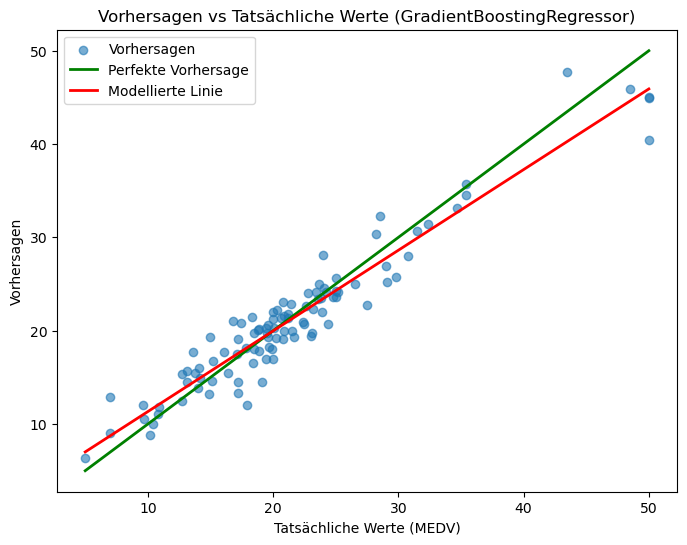

In [11]:


modell = GradientBoostingRegressor(random_state=42)
modell.fit(X_train0, y_train0)


y_vorhergesagt = modell.predict(X_test0)

mse = mean_squared_error(y_test0, y_vorhergesagt)
r2 = r2_score(y_test0, y_vorhergesagt)

print(f"Mittlere quadratische Abweichung (MSE) : {mse:.2f}")
print(f"Bestimmtheitsmaß (R²) : {r2:.2f}")

reg_line = LinearRegression()
reg_line.fit(y_test0.values.reshape(-1, 1), y_vorhergesagt)
x_vals = np.linspace(min(y_test0), max(y_test0), 100)
y_vals = reg_line.predict(x_vals.reshape(-1, 1))

plt.figure(figsize=(8, 6))
plt.scatter(y_test0, y_vorhergesagt, label="Vorhersagen", alpha=0.6)
plt.plot([min(y_test0), max(y_test0)], [min(y_test0), max(y_test0)], color='green', lw=2, label="Perfekte Vorhersage")
plt.plot(x_vals, y_vals, color='red', lw=2, label="Modellierte Linie")
plt.title('Vorhersagen vs Tatsächliche Werte (GradientBoostingRegressor)')
plt.xlabel('Tatsächliche Werte (MEDV)')
plt.ylabel('Vorhersagen')
plt.legend()
plt.show()

## **Bestimmung der Anzahl der Hauptkomponenten zur Erfassung eines Großteils der Datenvarianz**


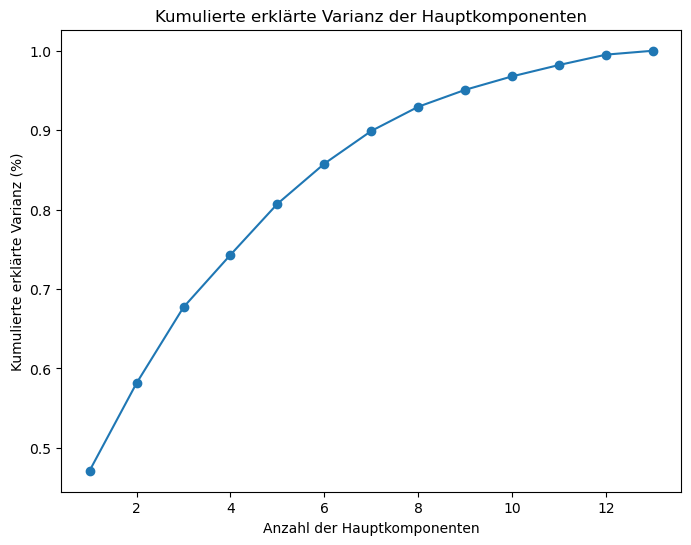

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('MEDV', axis=1))  

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(X_scaled[0])+1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Kumulierte erklärte Varianz der Hauptkomponenten')
plt.xlabel('Anzahl der Hauptkomponenten')
plt.ylabel('Kumulierte erklärte Varianz (%)')
plt.show()



In [13]:

pca = PCA(n_components=12)
X_pca_reduced = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_.cumsum()
print(f"Kumulierte erklärte Varianz mit 12 Komponenten: {explained_variance[-1]*100:.2f}%")

Kumulierte erklärte Varianz mit 12 Komponenten: 99.51%


In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X_pca_reduced, df['MEDV'], test_size=0.2, random_state=42)




##  Hyperparameteroptimierung mit GridSearchCV

### GridSearchCV: Optimierung von Hyperparametern

**Definition:**  
GridSearchCV ist eine Methode zur Optimierung von Hyperparametern in Machine-Learning-Modellen. Es testet systematisch alle möglichen Kombinationen von Hyperparametern, die in einem vordefinierten Raster (Grid) angegeben sind, und bewertet sie anhand einer Metrik wie der Genauigkeit oder dem R²-Wert.

**Funktionsweise:**
1. **Parameter-Raster:** Definieren eines Rasters von Hyperparametern und deren möglichen Werten.
2. **Kreuzvalidierung:** Für jede Parameterkombination wird das Modell mit Cross-Validation trainiert und bewertet.
3. **Optimales Modell:** Die Parameterkombination mit der besten Leistung wird ausgewählt.

**Vorteile:**
- Systematische und umfassende Suche.
- Integrierte Kreuzvalidierung zur Vermeidung von Overfitting.

Teste des Modells: Lineare Regression
Beste Parameter für Lineare Regression : {}
Bester Wert (MSE) für Lineare Regression : 24.23

------------------------------------------------------------------------------------------------------------------------------------------------------

Teste des Modells: Ridge Regression
Beste Parameter für Ridge Regression : {'alpha': 10}
Bester Wert (MSE) für Ridge Regression : 24.17

------------------------------------------------------------------------------------------------------------------------------------------------------

Teste des Modells: Lasso Regression
Beste Parameter für Lasso Regression : {'alpha': 0.1}
Bester Wert (MSE) für Lasso Regression : 24.07

------------------------------------------------------------------------------------------------------------------------------------------------------

Teste des Modells: ElasticNet
Beste Parameter für ElasticNet : {'alpha': 0.1, 'l1_ratio': 1}
Bester Wert (MSE) für ElasticNet : 24.07

--

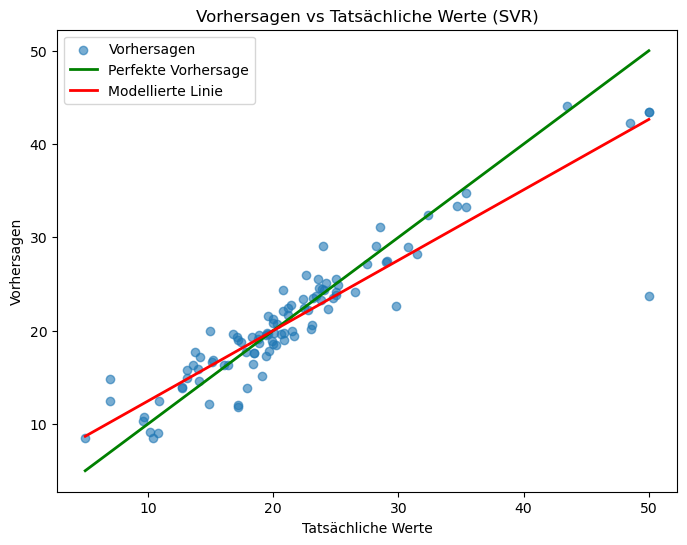

In [15]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV


models = [
    ('Lineare Regression', LinearRegression(), {}),
    ('Ridge Regression', Ridge(), {
        'alpha': [0.1, 1, 10, 100] 
    }),
    ('Lasso Regression', Lasso(), {
        'alpha': [0.1, 1, 10, 100] 
    }),
    ('ElasticNet', ElasticNet(), {
        'alpha': [0.1, 1, 10, 100],
        'l1_ratio': [0.1, 0.5, 0.7, 1]  
    }),
    ('Polynomiale Regression', None, { 
        'degree': [2, 3, 4]
    }),
    ('Support Vector Regression', SVR(), {
        'kernel': ['linear', 'rbf'],
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto']
    }),
    ('Entscheidungsbaum Regression', DecisionTreeRegressor(), {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }),
    ('Random Forest Regression', RandomForestRegressor(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }),
    ('Gradient Boosting Regression', GradientBoostingRegressor(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.5],
        'max_depth': [3, 5, 7]
    }),
    ('AdaBoost Regression', AdaBoostRegressor(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.5]
    }),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor(), {
        'n_neighbors': [3, 5, 10, 20],
        'weights': ['uniform', 'distance']
    })
]


best_model = None
best_score = float('inf')  

for model_name, model, params in models:
    print(f"Teste des Modells: {model_name}")
    
    if model_name == 'Polynomiale Regression':
       
        for degree in params['degree']:
            poly = PolynomialFeatures(degree=degree)
            X_poly = poly.fit_transform(X_train)
            grid_search = GridSearchCV(estimator=LinearRegression(), param_grid={}, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
            grid_search.fit(X_poly, y_train)
            
            print(f"Grad {degree} -> Bester Wert (MSE) : {-grid_search.best_score_:.2f}")
            print("\n" + "-"*150 + "\n")
            
            if -grid_search.best_score_ < best_score:
                best_score = -grid_search.best_score_
                best_model = grid_search.best_estimator_
    else:
        grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        #grid_search.fit(X_train0, y_train0) 
        
        print(f"Beste Parameter für {model_name} : {grid_search.best_params_}")
        print(f"Bester Wert (MSE) für {model_name} : {-grid_search.best_score_:.2f}")
        print("\n" + "-"*150 + "\n")
        
        if -grid_search.best_score_ < best_score:
            best_score = -grid_search.best_score_
            best_model = grid_search.best_estimator_

print("\n" + "-"*150 + "\n")

print(f"Bester Modell: {best_model}")

y_pred_best_model = best_model.predict(X_test)

mse_best_model = mean_squared_error(y_test, y_pred_best_model)
r2_best_model = r2_score(y_test, y_pred_best_model)


print(f"MSE des besten Modells : {mse_best_model:.2f}")
print(f"R² des besten Modells : {r2_best_model:.2f}")


reg_line.fit(y_test.values.reshape(-1, 1), y_pred_best_model)
x_vals = np.linspace(min(y_test), max(y_test), 100)
y_vals = reg_line.predict(x_vals.reshape(-1, 1))
plt.figure(figsize=(8, 6))
plt.scatter(y_test,y_pred_best_model, label="Vorhersagen", alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', lw=2, label="Perfekte Vorhersage")
plt.plot(x_vals, y_vals, color='red', lw=2, label="Modellierte Linie")
plt.title(f'Vorhersagen vs Tatsächliche Werte ({best_model.__class__.__name__})')
plt.xlabel('Tatsächliche Werte')
plt.ylabel('Vorhersagen')
plt.legend()
plt.show()


### Fazit (Kurz und bündig)

- **Daten-Skalierung ist entscheidend:** Modelle wie SVR, die auf Distanzen basieren, profitieren stark von standardisierten Daten. Ohne Standardisierung können solche Modelle schlecht abschneiden.  
- **Baum-basierte Modelle sind robust:** Gradient Boosting und ähnliche Algorithmen sind weniger empfindlich gegenüber der Skalierung und liefern oft konstante Ergebnisse.  
- **Teste verschiedene Ansätze:** Transformationen (z. B. Standardisierung) und Hyperparameter-Anpassungen können die Leistung eines Modells erheblich beeinflussen.  

👉 **Keine Methode ist universell besser – die Wahl des besten Modells hängt von den Daten und der Vorverarbeitung ab.**